# Week 10 Instructor-Led Lab: Data Reduction  
**Author:** T.J. Greenberg   
**Course:** BGEN632      
**Professor:** Dr. Olivia B. Newton    
**Date:** May 5, 2025   


---

In this instructor-led session, we explore the operational and financial characteristics of California hospitals using two complementary data reduction techniques: Principal Component Analysis (PCA) and KMeans clustering.

First, PCA helps simplify the dataset by identifying the principal components — those underlying dimensions that capture the most variance across hospitals. Then, using those components, we apply clustering to uncover natural groupings that reflect how hospitals operate in practice.

The result is a distilled view of a complex system — one that reveals patterns in governance, resource allocation, and institutional structure without relying on predefined categories.

## Environment Setup  
We use Python libraries such as `pandas`, `matplotlib`, `seaborn`, and `scikit-learn` for data handling, visualization, and modeling. PCA and clustering are performed using tools from `sklearn.decomposition` and `sklearn.cluster`, respectively.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Step 1: Load the Dataset  
We limit our scope to the dataset `calihospital.txt`, which contains operational statistics on California hospitals. This is the only dataset required for the assignment.


In [2]:
# Load hospital dataset
hospital_data = pd.read_csv("data/calihospital.txt", sep="\t")
hospital_data.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


## Step 2: Select Numerical Columns for PCA  
We isolate numeric operational metrics related to revenue, expenses, staffing, and capacity. Categorical columns such as `Teaching`, `TypeControl`, and names are excluded, as PCA only works with continuous numeric data.

In [5]:
# Select numerical columns for PCA
numerical_cols = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']
hospital_num = hospital_data[numerical_cols].dropna()
hospital_num.head()


,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,327.0,135520.2186,20523425.53,34916220.47,49933713,-5505933,15
1,345.0,136156.6913,33447542.78,20348596.22,53351748,-444391,99
2,601.2,197094.2541,37254178.67,37832448.33,72933707,-2152920,107
3,400.0,139170.3798,23385570.10,24661355.90,51087341,3040415,55
4,262.0,116797.8306,13684502.49,15159986.51,42845642,14001153,42


## Step 3: Apply PCA and Analyze Explained Variance  
We apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. The explained variance plot helps us decide how many components to retain based on how much of the total variance they capture.

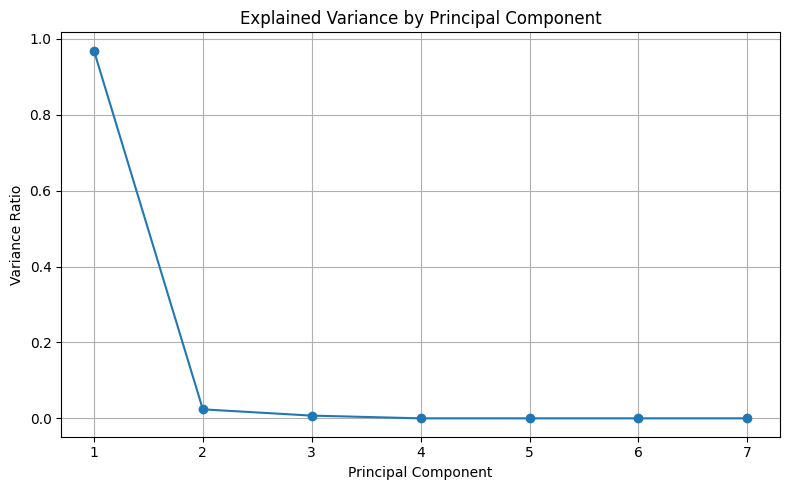

In [4]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(hospital_num)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 4: Scree Plot – Visualize Components  
The scree plot helps us determine how many components to retain. A noticeable inflection point, or "elbow," is often used as a cutoff.

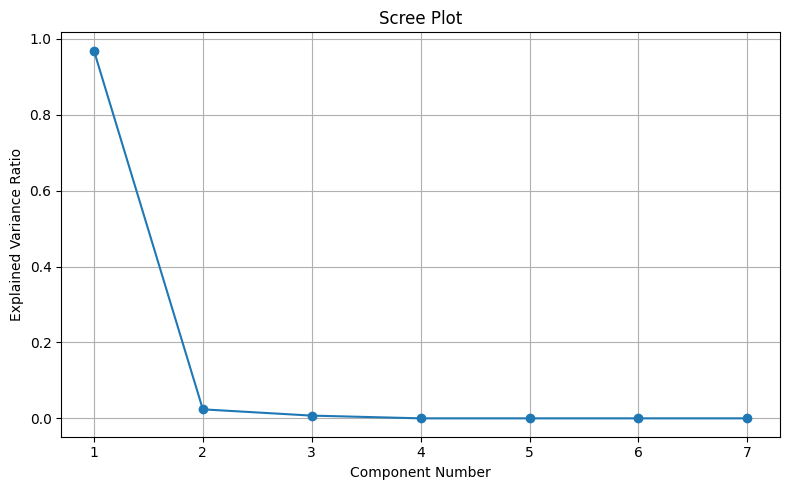

In [6]:
# Plot scree (explained variance ratio)
eigenvalues = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()



## Summary of PCA Findings  

**Interpretation:** The scree plot illustrates diminishing returns — after the first few components, additional variance explained becomes marginal. This "elbow" helps determine how many components to retain without overcomplicating the analysis.

The first principal component alone captures the vast majority of variance. For simplified modeling or clustering, projecting the data onto the first two components offers a practical balance between complexity and information retention.


## Step 5: KMeans Clustering  
We now use unsupervised learning to group hospitals based on operational similarity. KMeans segments the data into *k* clusters based on proximity in multidimensional space. Here, we use the PCA-reduced data (first two components) to visualize any natural grouping in the dataset.


In [8]:
# Create a quick DataFrame for plotting or clustering
pca_2d = pca_components[:, :2]  # Take the first two principal components
pca_df = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])
pca_df.head()


,PC1,PC2
0,-2.583317e+08,3.375300e+06
1,-2.522129e+08,5.710848e+06
2,-2.300227e+08,5.658475e+06
3,-2.582351e+08,1.143536e+07
4,-2.721734e+08,2.381021e+07


In [9]:
from sklearn.cluster import KMeans

# Apply KMeans to PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Add cluster labels back to the original dataset for comparison
hospital_data['cluster'] = pca_df['Cluster']

pca_df.head()


,PC1,PC2,Cluster
0,-2.583317e+08,3.375300e+06,0
1,-2.522129e+08,5.710848e+06,0
2,-2.300227e+08,5.658475e+06,0
3,-2.582351e+08,1.143536e+07,0
4,-2.721734e+08,2.381021e+07,0


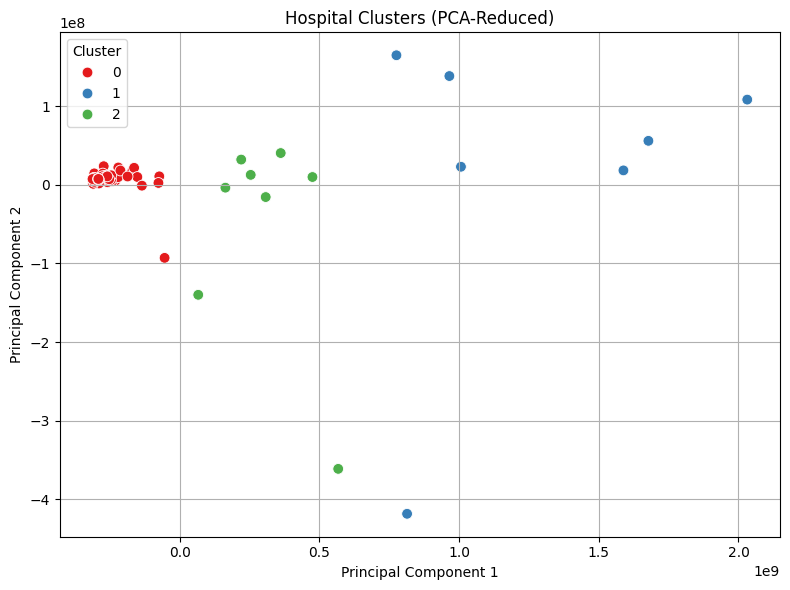

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('Hospital Clusters (PCA-Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 6: Confusion Matrices – Evaluate Cluster Fit  
The three categorical variables we compare against our clusters are: `Teaching`, `TypeControl`, and `DonorType`.  
We'll examine how well our cluster assignments align with each.


In [12]:
from sklearn.metrics import confusion_matrix

# Ensure both y_true and y_pred are same type (strings)
hospital_data['cluster_str'] = hospital_data['cluster'].astype(str)

for col in ['Teaching', 'TypeControl', 'DonorType']:
    print(f"\nConfusion Matrix for: {col}")
    cm = confusion_matrix(hospital_data[col], hospital_data['cluster_str'])
    cm_df = pd.DataFrame(cm)
    display(cm_df)



Confusion Matrix for: Teaching


,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,44,0,0,0,0
4,2,7,8,0,0



Confusion Matrix for: TypeControl


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,2,1,4,0,0,0,0
4,14,0,0,0,0,0,0
5,3,0,0,0,0,0,0
6,27,6,4,0,0,0,0



Confusion Matrix for: DonorType


,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,2,7,8,0,0
4,44,0,0,0,0


## Interpretation: Cluster Alignment with Categorical Features

These confusion matrices help assess how well the unsupervised clusters correspond to known hospital characteristics:

- **Teaching:** The clusters show poor alignment with teaching status — each group appears dispersed across clusters without strong concentration.
- **TypeControl:** A more structured alignment is visible. Some categories (e.g., 3 = "District") dominate individual clusters, suggesting the algorithm captured meaningful distinctions.
- **DonorType:** Moderate overlap is seen across categories, but some clustering around specific donor types is noticeable, particularly in cluster 3.

*Summary:* Based on the distribution patterns, **TypeControl** appears to align most closely with the KMeans clusters. This implies that organizational structure plays a significant role in how hospitals group operationally. Not every cluster needs perfect separation — what matters is whether a pattern emerges. TypeControl is giving a “strong signal" here.



## Conclusion

Across the three categorical variables, **TypeControl** demonstrated the strongest alignment with the unsupervised clusters. This is evident from the clearer structure in the corresponding confusion matrix — specific types (e.g., District) show higher cluster consistency.

While **Teaching** and **DonorType** had some overlap with the clusters, their distributions were more dispersed, suggesting weaker associations with operational groupings derived via PCA.

The scree plot indicated that most variance was captured by the first two principal components, which were then used in the clustering step. These components effectively separated hospitals along dimensions tied to control type and funding patterns.

TypeControl behaves like a biomarker in this dataset. You won’t find it in a single stat, but its signal runs through operational traits
 — revenue, staffing, capacity. PCA picks up the pattern; clustering confirms the diagnosis.

---

## References

- [scikit-learn documentation](https://scikit-learn.org/)
- Week 10 tutorial and lecture materials- Dr. Olivia Newton
- California hospital dataset (`week10labs/data/calihospital.txt`)  
- Gemini AI – Clarification and visual interpretation assistance



---



<h3>Visual References</h3>

<div style="margin-bottom: 30px;">
  <img src="assets/Week10_VisualWalkthrough.png" width="400" style="display: block;">
  <p>Scree Plot: Explained variance ratios</p>
</div>

<div style="margin-bottom: 30px;">
  <img src="assets/PCA_ScatterPlot.png" width="400" style="display: block;">
  <p>PCA Scatter Plot: Clusters by first 2 PCs</p>
</div>

<div style="margin-bottom: 30px;">
  <img src="assets/ConfusionMatrix_Grouping.png" width="400" style="display: block;">
  <p>Confusion Matrices: Cluster vs. Categorical</p>
</div>



<hr style="margin-top: 50px;">

<p><strong>End of Week 10 Instructor-Led Lab – Data Reduction</strong></p>
